![](https://storage.googleapis.com/palma/mandau/pxHX_449AhqpVUhOdhQX.jpeg)
#   Pengantar 
Kumpulan data ini berisi informasi historis mengenai pergerakan harga saham PT Bank Rakyat Indonesia (Persero) Tbk (BBRI) yang tercatat di Bursa Efek Indonesia (BEI). Data ini mencakup periode dari tanggal 10 November 2003 hingga 15 Maret 2011. Setiap baris dalam dataset mewakili data perdagangan saham BBRI pada hari tertentu, termasuk harga pembukaan, harga penutupan, harga tertinggi, harga terendah, serta volume perdagangan saham pada hari tersebut.

Dataset ini dapat digunakan untuk analisis teknis, prediksi harga saham, atau studi pasar saham secara umum. Data ini juga dapat membantu investor atau analis dalam memahami pola pergerakan harga saham BBRI selama periode tertentu.

# Information Colomn
- **Date** :Tanggal perdagangan saham BBRI. Format tanggal yang digunakan adalah YYYY-MM-DD. 
- **Close** : Harga penutupan saham BBRI pada hari tersebut. Harga penutupan adalah harga terakhir saham diperdagangkan pada hari itu.
- **High** : Harga tertinggi saham BBRI yang tercapai selama sesi perdagangan pada hari tersebut.
- **Low**:Harga terendah saham BBRI yang tercapai selama sesi perdagangan pada hari tersebut.
- **Open**:Harga pembukaan saham BBRI pada hari tersebut. Harga pembukaan adalah harga pertama saham diperdagangkan pada hari itu.
- **Volume**:Jumlah saham BBRI yang diperdagangkan pada hari tersebut. Volume perdagangan mencerminkan aktivitas pasar dan likuiditas saham.


Import Modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime,timedelta
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import TimeSeriesSplit
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout
import tensorflow as tf
import seaborn as sns
from keras.callbacks import EarlyStopping
from keras_tuner import RandomSearch
import json

plt.style.use('fivethirtyeight')

# Gathering Data
Kita bisa masuk ke tahap gathering data. Pada tahap ini, kita akan mengumpulkan semua data yang dibutuhkan. 

In [3]:
# # load dataset
stock_data = pd.read_csv('BBRI.JK.NEW.csv')


In [4]:
stock_data.head()#Menampilkan 5 baris pertama

,Date,Close,High,Low,Open,Volume
0,11/10/2003,42.323605,47.749708,41.238383,45.579265,5658651738
1,11/11/2003,43.408825,43.408825,41.238385,42.323607,3232466332
2,11/12/2003,45.579269,45.579269,42.323608,42.323608,2203244555
3,11/13/2003,45.579269,45.579269,44.494048,45.579269,1309077610
4,11/14/2003,45.579269,45.579269,43.408826,45.579269,1897824280


In [5]:
stock_data.tail()#Menampilkan 5 baris terakhir

,Date,Close,High,Low,Open,Volume
5281,3/10/2025,3760.0,3810.0,3730.0,3790.0,232192200
5282,3/11/2025,3790.0,3790.0,3660.0,3700.0,273961800
5283,3/12/2025,3890.0,3920.0,3810.0,3810.0,271631200
5284,3/13/2025,3800.0,3970.0,3800.0,3960.0,209225700
5285,3/14/2025,3750.0,3840.0,3750.0,3750.0,156131900


# Cleaning Data
Nah, sekarang  akan memasuki proses terakhir dalam data wrangling yaitu pembersihan atau cleaning data. Pada tahap ini,saya akan membersihkan berbagai masalah yang telah teridentifikasi dalam proses assessing data.


1. Konversi kolom Date menjadi tipe datetime.

In [6]:
# Mengonversi kolom 'date' menjadi tipe datetime
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

In [7]:
# Jika Anda ingin mengatur kolom 'date' sebagai indeks
stock_data.set_index('Date', inplace=True)


2. Penanganan duplikasi data.

Identify duplicate entries/rows

In [8]:
stock_data.nunique()#nilai unik di setiap kolom dan deskripsi data, kita dapat mengidentifikasi kolom kontinu dan kategorikal dalam data. 

Close     1948
High      4020
Low       4090
Open      3724
Volume    5104
dtype: int64

menampilkan duplikasi data

In [9]:
# stock_data[stock_data.duplicated(keep=False)]#menampilkan seluruh baris dengan duplikasi
stock_data[stock_data.duplicated()]#menampilkan hanya baris duplikasi sekunder

,Close,High,Low,Open,Volume
Date,,,,,
2003-11-25,45.579269,45.579269,45.579269,45.579269,0
2003-11-26,45.579269,45.579269,45.579269,45.579269,0
2003-11-27,45.579269,45.579269,45.579269,45.579269,0
2003-11-28,45.579269,45.579269,45.579269,45.579269,0
2003-12-25,54.261028,54.261028,54.261028,54.261028,0
2003-12-26,54.261028,54.261028,54.261028,54.261028,0
2003-12-31,54.261028,54.261028,54.261028,54.261028,0
2004-01-01,54.261028,54.261028,54.261028,54.261028,0
2004-07-05,74.880226,74.880226,74.880226,74.880226,0


menghitung jumlah duplikasi data

In [10]:
stock_data.duplicated().value_counts() #hitung jumlah duplikasi data

False    5232
True       54
Name: count, dtype: int64

untuk mendeteksi dan menangani outlier dalam data.
Dari data duplikasi diatas, "True" dan "False" mengindikasikan keberadaan duplikat dalam kumpulan data .
**False** (5201):
Ini berarti ada 5201 baris data yang unik, atau tidak memiliki duplikat. Dengan kata lain, data-data ini hanya muncul sekali dalam kumpulan data.
**True** (54):
Ini berarti ada 54 baris data yang merupakan duplikat. Data-data ini muncul lebih dari satu kali dalam kumpulan data.
Secara sederhana:

"False" = Bukan duplikat (unik)
"True" = Duplikat


Memeriksa baris duplikat

In [11]:
print(stock_data.duplicated().sum())  # Jumlah baris duplikat

54


 Menghapus baris duplikat

In [12]:
stock_data = stock_data.drop_duplicates()


menampilkan jumlah data yang telah dihilangkan duplikasinya


In [13]:
stock_data.shape#Menampilkan ukuran data setelah menghapus duplikasi

(5232, 5)

Identify missing values


In [14]:
stock_data.isna().values.any()#mendeteksi keberadaan nilai kosong
#Jika false berarti tidak ada data kosong
#Jika True berarti ada data kosong

False

3. Pemeriksaan nilai kosong dan outlier.

Identify how many NaN or Null values it has

In [15]:
stock_data.isnull().sum()#Mengecek nilai yang null

Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

Pemeriksaan dan Penanganan Outlier

In [16]:
# Contoh deteksi outlier menggunakan IQR
Q1 = stock_data['Close'].quantile(0.25)
Q3 = stock_data['Close'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = stock_data[(stock_data['Close'] < lower_bound) | (stock_data['Close'] > upper_bound)]
print(outliers)

Empty DataFrame
Columns: [Close, High, Low, Open, Volume]
Index: []


# Assessing Data
Sekarang  masuk ke tahap kedua dalam proses data wrangling yaitu assessing data.Pada proses ini kita akan menilai kualitas dari seluruh data yang akan digunakan. Penilaian ini bertujuan untuk melihat berbagai permasalahan yang ada dalam data tersebut.


1. Pemeriksaan statistik deskriptif.

Sekarang melakukan pemeriksaan parameter statistik dari kolom numerik yang terdapat dalam stock_data. Untuk mempermudah pemeriksaan, saya akan menggunakan method describe(). Method tersebut akan menampilkan ringkasan parameter statistik (mean, median, dll.) dari kolom numerik pada sebuah DataFrame. Berikut merupakan contoh penggunaannya.

In [17]:
stock_data.describe(include="all")#deskripsi data

,Close,High,Low,Open,Volume
count,5232.000000,5232.000000,5232.000000,5232.000000,5.232000e+03
mean,1655.835474,1675.411777,1637.145692,1656.776122,1.790165e+08
std,1495.992632,1512.212223,1482.128014,1497.251709,1.596674e+08
min,42.323605,43.408822,41.238383,42.323607,0.000000e+00
25%,359.074768,368.108059,350.404039,360.710051,9.770063e+07
50%,1232.398132,1247.707291,1224.694702,1232.073381,1.428938e+08
75%,2687.149598,2723.316313,2661.536741,2697.201961,2.167517e+08
max,6097.500000,6121.696217,6024.910506,6097.500000,5.658652e+09


Get basic dataset Information

In [18]:
stock_data.info()#informasi dataset

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5232 entries, 2003-11-10 to 2025-03-14
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   5232 non-null   float64
 1   High    5232 non-null   float64
 2   Low     5232 non-null   float64
 3   Open    5232 non-null   float64
 4   Volume  5232 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 245.2 KB


2. Visualisasi data.

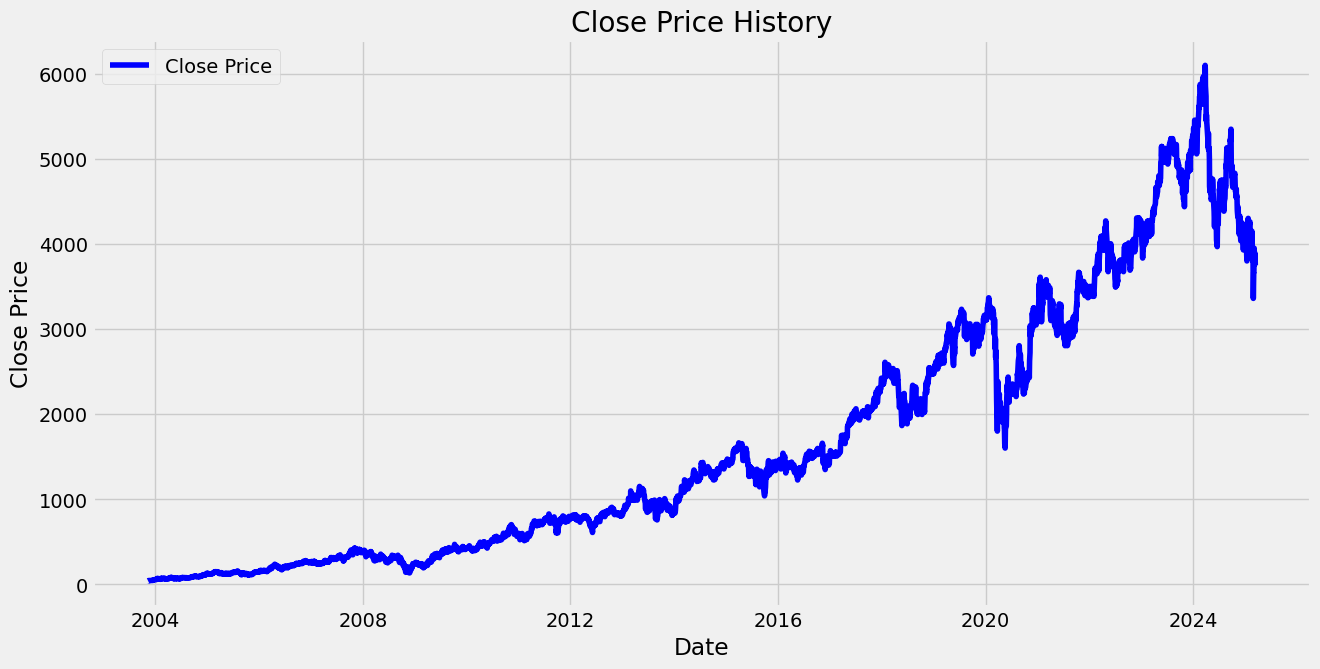

In [19]:
# Visualisasi Harga Penutupan
plt.figure(figsize=(14, 7))
plt.plot(stock_data['Close'], label='Close Price', color='blue')
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

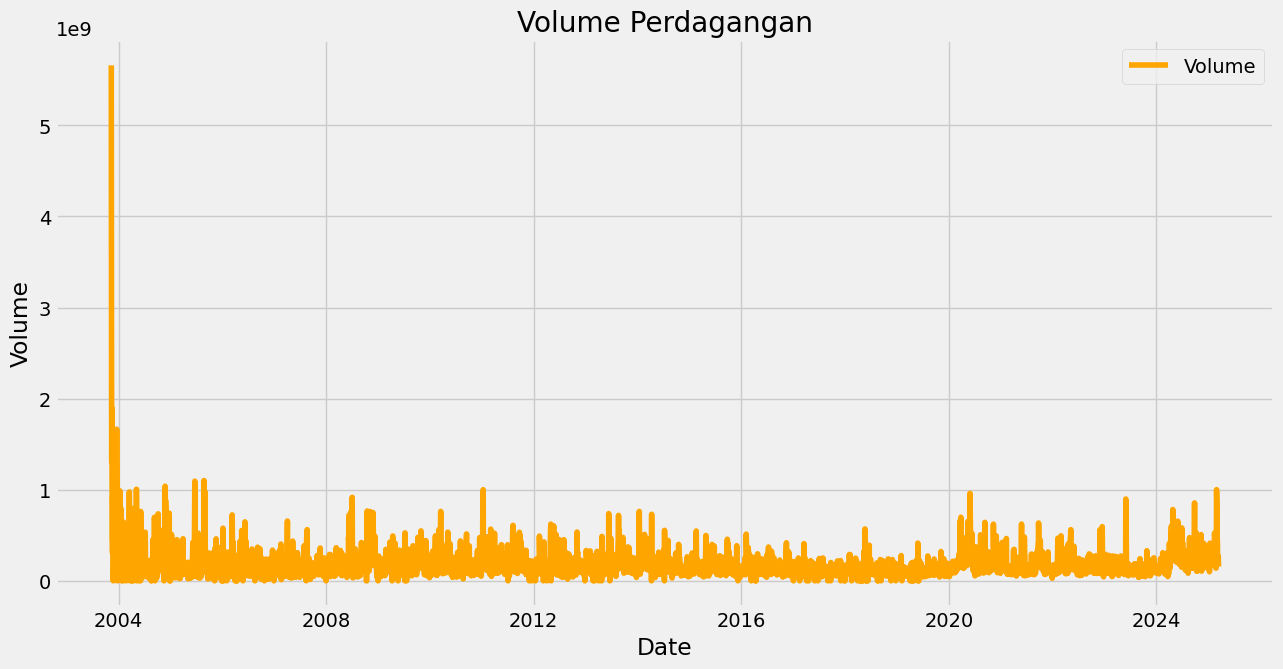

In [20]:
# Visualisasi Volume Perdagangan
plt.figure(figsize=(14, 7))
plt.plot(stock_data['Volume'], label='Volume', color='orange')
plt.title('Volume Perdagangan')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

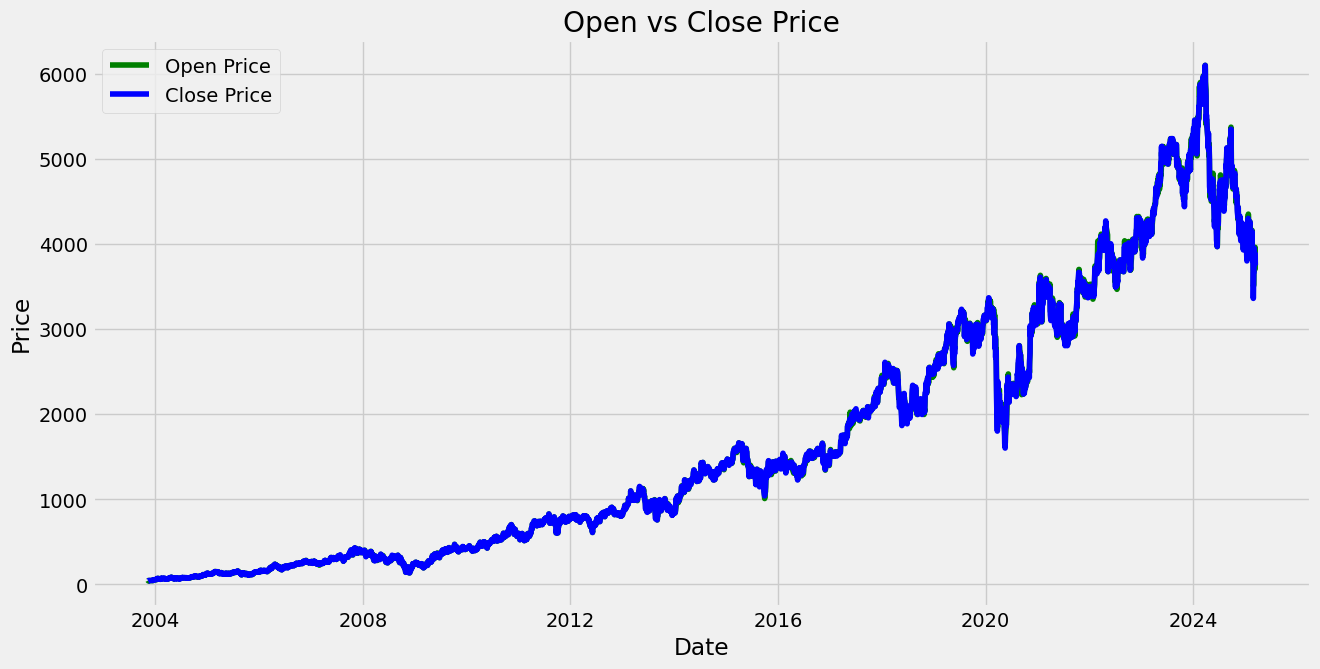

In [21]:
# Visualisasi Harga Pembukaan vs Penutupan
plt.figure(figsize=(14, 7))
plt.plot(stock_data['Open'], label='Open Price', color='green')
plt.plot(stock_data['Close'], label='Close Price', color='blue')
plt.title('Open vs Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

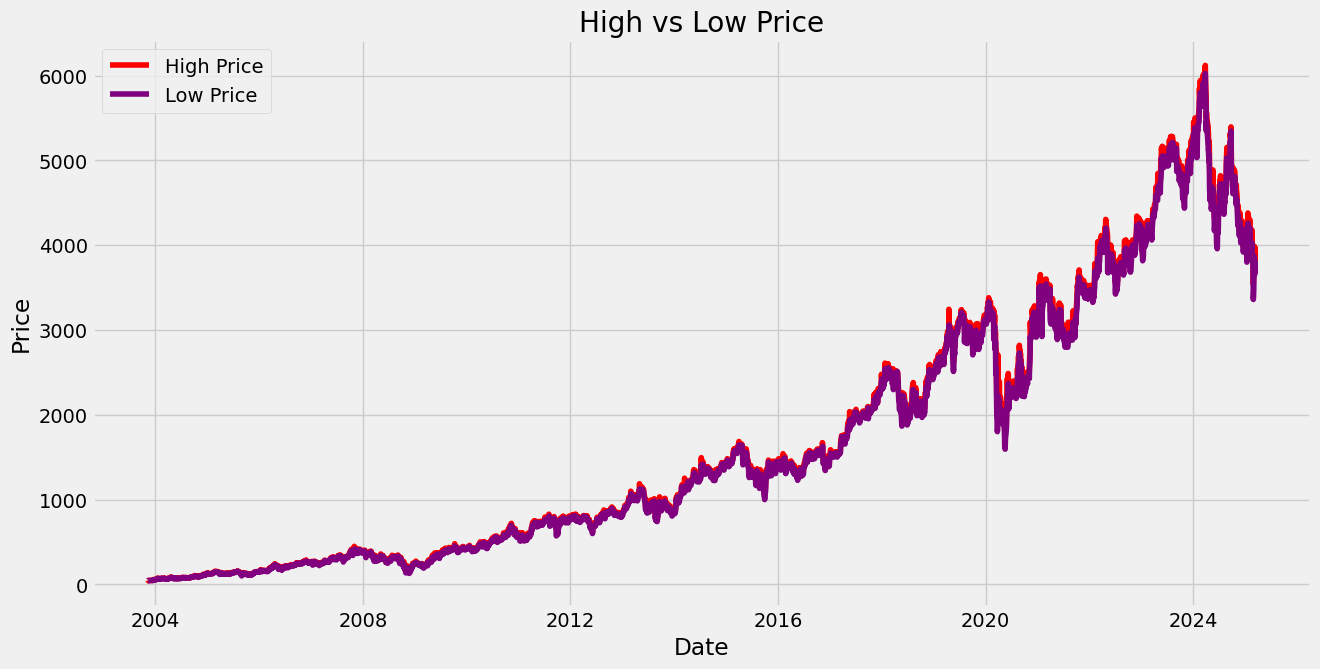

In [22]:
# Visualisasi Harga Tertinggi vs Terendah
plt.figure(figsize=(14, 7))
plt.plot(stock_data['High'], label='High Price', color='red')
plt.plot(stock_data['Low'], label='Low Price', color='purple')
plt.title('High vs Low Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

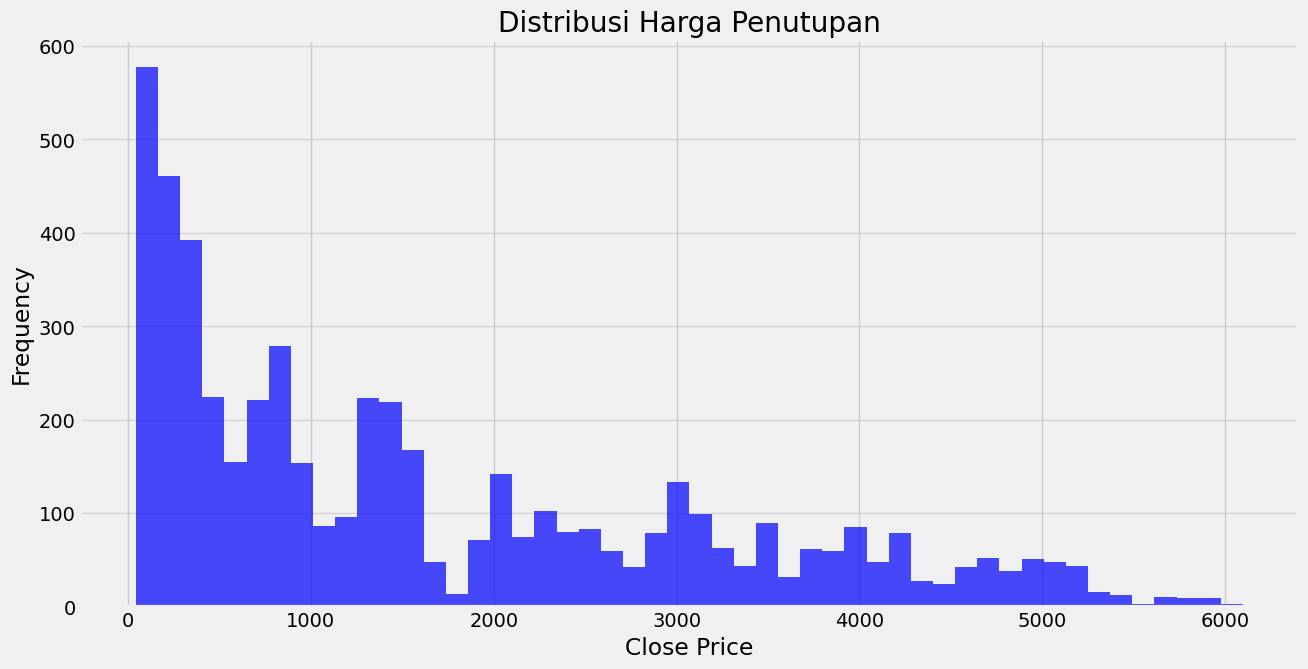

In [23]:
# Visualisasi Distribusi Harga Penutupan
plt.figure(figsize=(14, 7))
plt.hist(stock_data['Close'], bins=50, color='blue', alpha=0.7) 
plt.title('Distribusi Harga Penutupan')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

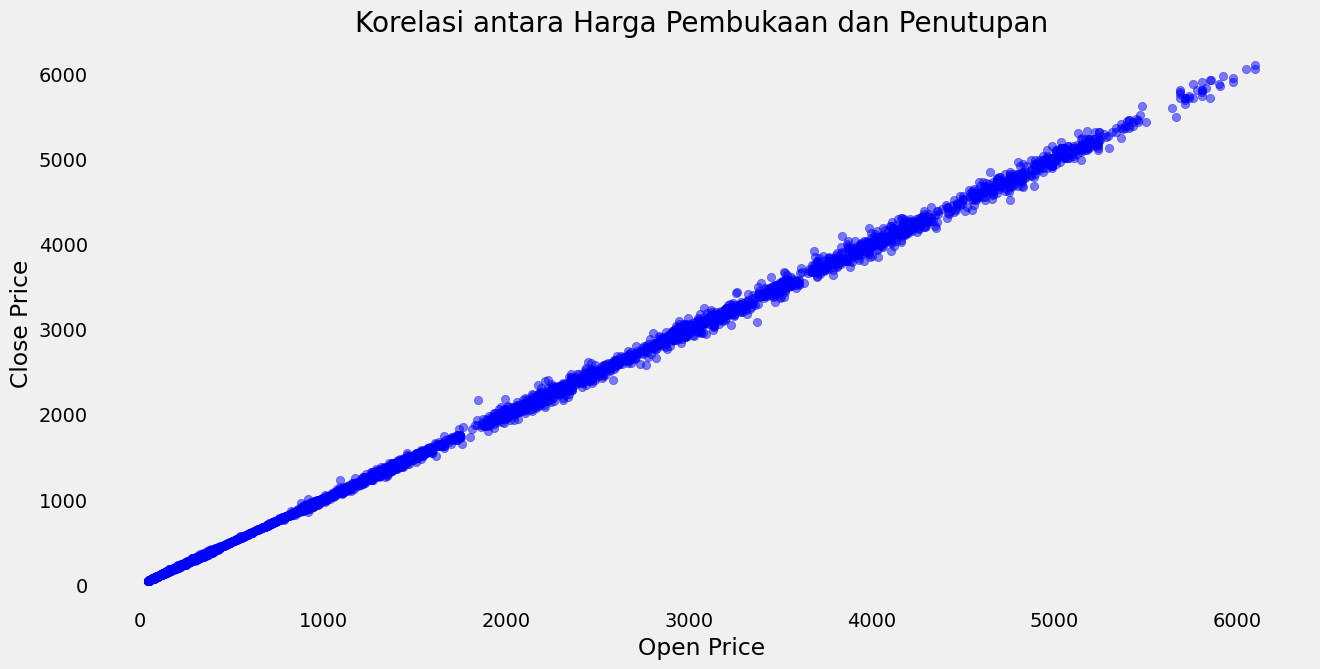

In [24]:
# Visualisasi Korelasi antara Fitur
plt.figure(figsize=(14, 7))
plt.scatter(stock_data['Open'], stock_data['Close'], alpha=0.5, color='blue')
plt.title('Korelasi antara Harga Pembukaan dan Penutupan')
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.grid()
plt.show()

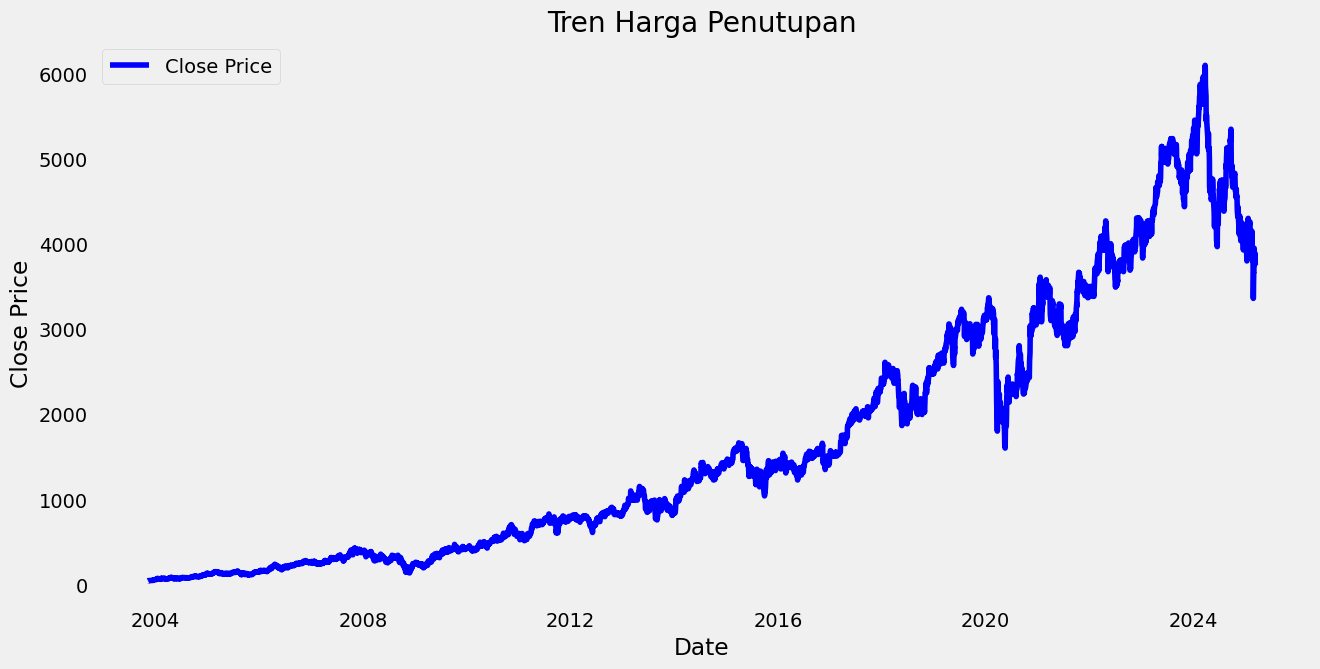

In [25]:
# Visualisasi Tren Harga Penutupan
plt.figure(figsize=(14, 7))
plt.plot(stock_data['Close'], label='Close Price', color='blue')
plt.title('Tren Harga Penutupan')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid()
plt.show()

# Preprocessing Data
Nah, sekarang  akan memasuki proses preprocessing dimana proses ini persiapan data dan pembuatan model LSTM untuk melakukan prediksi harga penutupan saham.selanjutnya data tersebut disklakan ke rentang [0,1] menggunakan minmaxscaler.data latihan dipisahkan dan disiapkan dalam format yang sesuai untuk melatih model LSTM


interpolasi linear.
untuk memastikan semua tanggal ada, lalu isi nilai kosong dengan interpolasi.

In [26]:
# Pastikan semua tanggal ada dalam rentang waktu
stock_data = stock_data.asfreq('B')  # Mengisi hanya hari kerja (Business Days)

# Isi nilai kosong dengan interpolasi linear
stock_data.interpolate(method='linear', inplace=True)

# Pastikan tidak ada nilai kosong setelah interpolasi
print(stock_data.isnull().sum())

Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64


Normalisasi data menggunakan MinMaxScaler.

In [27]:
# LSTM-> Long short term memory
# Skalakan data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(stock_data[['Close']].dropna())

In [28]:
len(scaled_data)

5570

Pembuatan fitur tambahan seperti Moving Average.

In [29]:
# Moving Average
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
# moving average for 5 day -> null null null null 30.0 40.0
print(sum(temp_data[1:6])/5)

40.0


In [30]:
df1 = pd.DataFrame(temp_data)

In [31]:
df1.rolling(window=5, min_periods=1).mean()

,0
0,10.0
1,15.0
2,20.0
3,25.0
4,30.0
5,40.0
6,50.0
7,60.0
8,70.0
9,80.0


In [32]:
for i in range(2003, 2025):
    print(i, list(stock_data.index.year).count(i))

2003 38
2004 262
2005 260
2006 260
2007 261
2008 262
2009 261
2010 261
2011 260
2012 261
2013 261
2014 261
2015 261
2016 261
2017 260
2018 261
2019 261
2020 262
2021 261
2022 260
2023 260
2024 262


In [33]:
# Create closing_price DataFrame from stock_data
closing_price = stock_data[['Close']].copy()
# Calculate Moving Averages
closing_price['MA_365'] = closing_price['Close'].rolling(window=365).mean()
closing_price['MA_100'] = closing_price['Close'].rolling(window=100).mean()

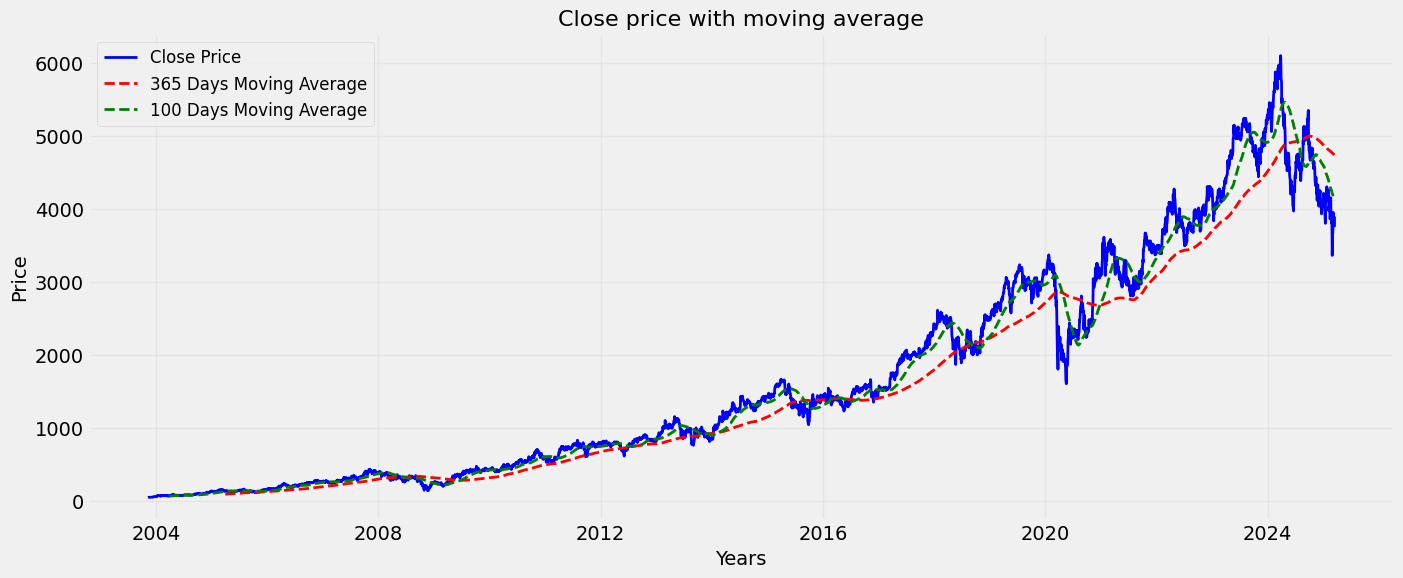

In [34]:
#Plot closing price with enchacement
plt.figure(figsize = (15, 6))
plt.plot(closing_price.index, closing_price['Close'], label = 'Close Price', color = 'blue', linewidth =2)
plt.plot(closing_price.index, closing_price['MA_365'], label = '365 Days Moving Average', color = 'red', linestyle ="--", linewidth =2)
plt.plot(closing_price.index, closing_price['MA_100'], label = '100 Days Moving Average', color = 'green',linestyle ="--", linewidth =2)

plt.title("Close price with moving average", fontsize = 16)
plt.xlabel("Years", fontsize = 14)
plt.ylabel('Price', fontsize = 14)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 12)
plt.show()

# Data spliting


In [35]:
# Create sequences for LSTM
base_days = 100
step = 5
x_data = []
y_data = []

for i in range(base_days, len(scaled_data), step):
    sequence = scaled_data[i-base_days:i]
    target = scaled_data[i]
    x_data.append(sequence)
    y_data.append(target)

x_data = np.array(x_data)
y_data = np.array(y_data)


In [36]:
# Split data into train, validation and test sets
train_size = int(len(x_data) * 0.9)
x_train, y_train = x_data[:train_size], y_data[:train_size]
x_test, y_test = x_data[train_size:], y_data[train_size:]

In [37]:
val_size = int(len(x_train) * 0.1)
x_val, y_val = x_train[-val_size:], y_train[-val_size:]
x_train, y_train = x_train[:-val_size], y_train[:-val_size]

In [38]:
# Menampilkan ukuran data training dan testing
print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}, y_test shape: {y_test.shape}")

x_train shape: (886, 100, 1), y_train shape: (886, 1)
x_test shape: (110, 100, 1), y_test shape: (110, 1)


# Pembuatan model

 Arsitektur Model LSTM
- LSTM (Long Short-Term Memory) adalah jenis arsitektur model yang digunakan dalam
teknik deep learning untuk memprediksi nilai-nilai masa depan dari suatu data



Hyperparameter Tuning
untuk mencari kombinasi hyperparameter terbaik.

In [39]:
def build_model(hp):
    model = Sequential([
        LSTM(hp.Int('units', min_value=32, max_value=256, step=32), 
             return_sequences=True, input_shape=(x_train.shape[1], 1)),
        LSTM(hp.Int('units_2', min_value=32, max_value=128, step=32), 
             return_sequences=True),
        LSTM(hp.Int('units_3', min_value=16, max_value=64, step=16), 
             return_sequences=False),
        Dense(hp.Int('dense_units', min_value=16, max_value=64, step=16)),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Create final model
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)),
    LSTM(64, return_sequences=True),
    LSTM(32, return_sequences=False),
    Dense(25),
    Dense(1)
])

model.compile(optimizer="adam", loss="mean_squared_error")

# Pelatihan Model:

Peningkatan Epochs
Tingkatkan jumlah epoch dan gunakan callback seperti EarlyStopping untuk menghentikan pelatihan jika tidak ada peningkatan.

In [40]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True   
)

# Saat training model
history = model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=50,
    batch_size=5,
    callbacks=[early_stopping]
)



Epoch 1/50

178/178 [==============================] - 24s 90ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 2/50
178/178 [==============================] - 24s 134ms/step - loss: 2.9679e-04 - val_loss: 6.5718e-04
Epoch 3/50
178/178 [==============================] - 18s 100ms/step - loss: 2.6460e-04 - val_loss: 7.7162e-04
Epoch 4/50
178/178 [==============================] - 19s 106ms/step - loss: 3.0081e-04 - val_loss: 5.1387e-04
Epoch 5/50
178/178 [==============================] - 18s 99ms/step - loss: 2.7477e-04 - val_loss: 7.8437e-04
Epoch 6/50
178/178 [==============================] - 18s 100ms/step - loss: 2.3583e-04 - val_loss: 0.0035
Epoch 7/50
178/178 [==============================] - 18s 103ms/step - loss: 3.1359e-04 - val_loss: 5.0262e-04
Epoch 8/50
178/178 [==============================] - 18s 102ms/step - loss: 2.5384e-04 - val_loss: 0.0028
Epoch 9/50
178/178 [==============================] - 19s 105ms/step - loss: 1.6498e-04 - val_loss: 0.0021
Epoch 10/50
178/178 [=

In [41]:


history_dict = {
    'loss': [float(x) for x in history.history['loss']],
    'val_loss': [float(x) for x in history.history['val_loss']]
}

with open('model_history.json', 'w') as f:
    json.dump(history_dict, f)

print("Model and history saved successfully!")

Model and history saved successfully!


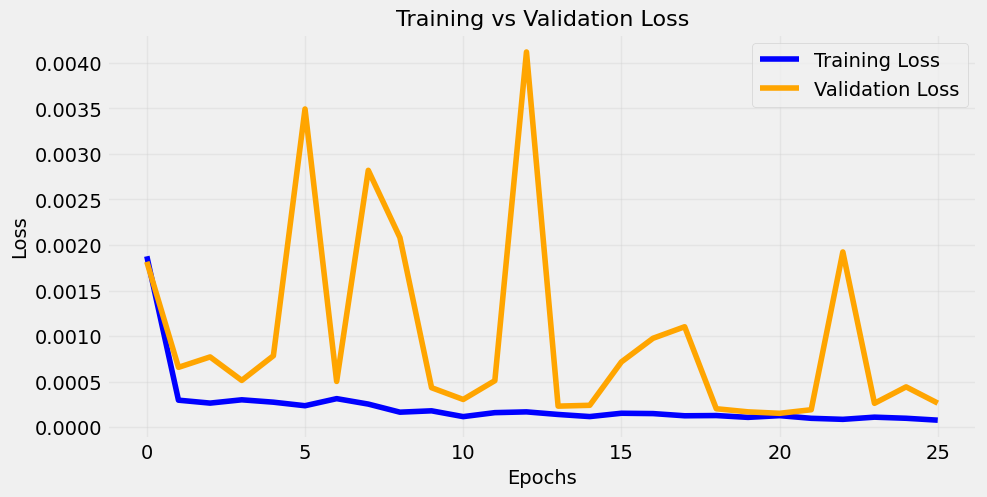

In [43]:
# Visualisasi Training Loss vs Validation Loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training vs Validation Loss', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Melakukan Prediksi

Model dilatih untuk memprediksi harga saham BBRI berdasarkan data uji. Hasil prediksi kemudian diubah kembali ke skala aslinya menggunakan scaler. Selanjutnya, nilai MAPE dihitung untuk mengukur seberapa akurat model dalam memprediksi harga saham.

In [44]:
def predict_future(model, scaler, data, days_to_predict):
    predictions = []
    last_sequence = data[-100:].reshape(1, 100, 1)

    for _ in range(days_to_predict):
        next_pred = model.predict(last_sequence, verbose=0)[0]
        predictions.append(next_pred)
        last_val = next_pred.reshape(1, 1, 1)
        last_sequence = np.concatenate([last_sequence[:, 1:, :], last_val], axis=1)

    predictions = np.array(predictions).reshape(-1, 1)
    predictions = scaler.inverse_transform(predictions).flatten()
    return predictions

# Evaluasi Model

In [45]:
# Make predictions
predictions = model.predict(x_test)
inv_predictions = scaler.inverse_transform(predictions)
inv_y_test = scaler.inverse_transform(y_test)

4/4 [==============================] - 2s 55ms/step


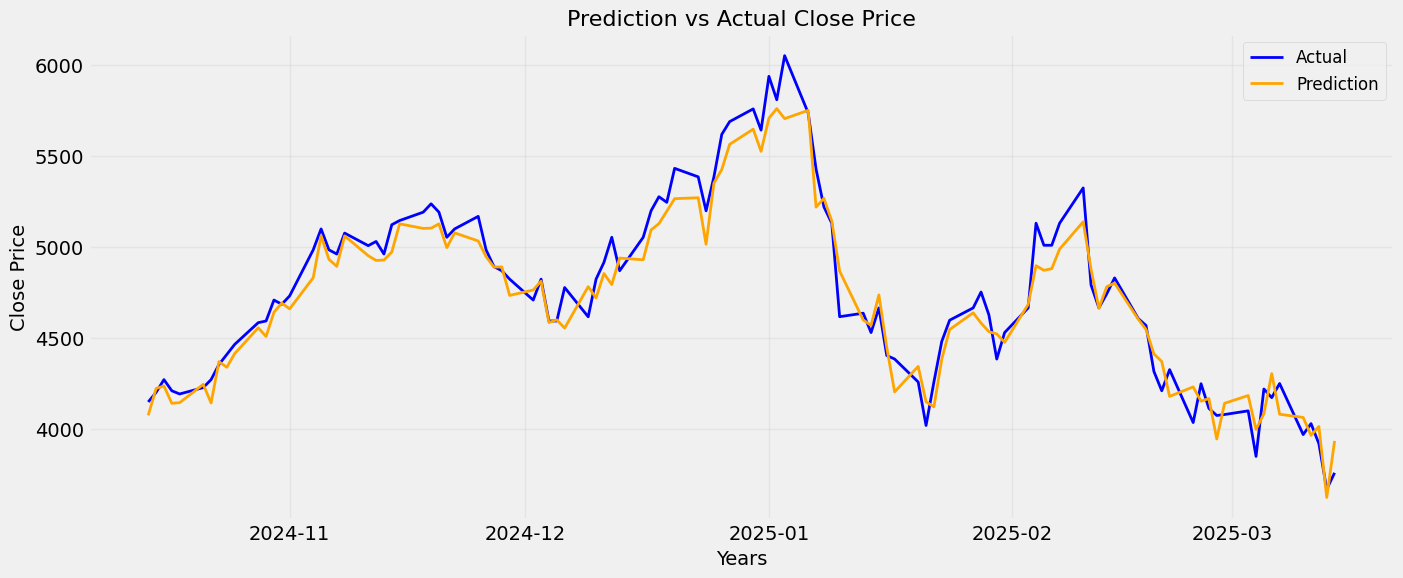

In [46]:
# Get the correct length of test data
test_size = len(inv_y_test)

# Create index for plotting
test_index = closing_price.index[-test_size:]

# Create DataFrame with correct index
plotting_data = pd.DataFrame(
    {
        'Actual': inv_y_test.flatten(),
        'Prediction': inv_predictions.flatten()
    },
    index=test_index
)

plt.figure(figsize=(15, 6))
plt.plot(plotting_data.index, plotting_data['Actual'], label='Actual', color='blue', linewidth=2)
plt.plot(plotting_data.index, plotting_data['Prediction'], label='Prediction', color='orange', linewidth=2)
plt.title("Prediction vs Actual Close Price", fontsize=16)
plt.xlabel("Years", fontsize=14)
plt.ylabel('Close Price', fontsize=14)
plt.grid(alpha=0.3)
plt.legend(fontsize=12)
plt.show()

In [47]:
# Calculate MAPE and Accuracy
mape = np.mean(np.abs((inv_predictions - inv_y_test) / inv_y_test)) * 100


In [48]:
# Menghitung akurasi
accuracy = 100 - mape

In [49]:
# Menampilkan hasil
print(f'MAPE: {mape:.4f}')
print(f'Akurasi: {accuracy:.2f}%')

MAPE: 1.9492
Akurasi: 98.05%


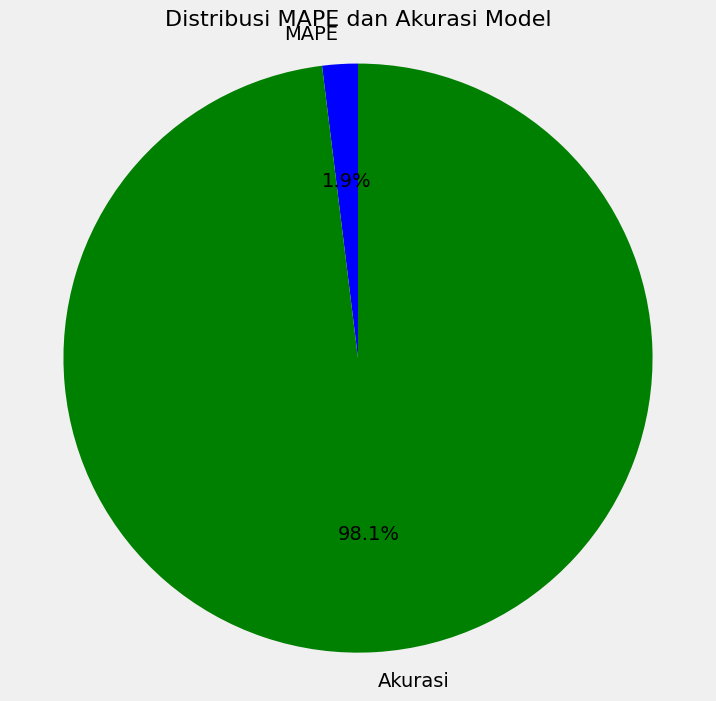

In [50]:
# Visualisasi MAPE dan Akurasi dalam bentuk diagram lingkaran
labels = ['MAPE', 'Akurasi']
values = [mape, accuracy]

# Membuat diagram lingkaran
plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=['blue', 'green'])
plt.title('Distribusi MAPE dan Akurasi Model', fontsize=16)
plt.axis('equal')  # Agar diagram lingkaran berbentuk bulat
plt.show()

# Prediksi Masa Depan


In [51]:
# Predict next 10 days
last_100 = scaled_data[-100:].reshape(1, -1, 1)
future_predictions = []

for _ in range(10):
    next_days = model.predict(last_100)
    future_predictions.append(scaler.inverse_transform(next_days))
    last_100 = np.append(last_100[:, 1:, :], next_days.reshape(1, 1, -1), axis=1)





1/1 [==============================] - 0s 34ms/step


In [52]:
future_predictions

[array([[3839.1143]], dtype=float32),
 array([[3813.7449]], dtype=float32),
 array([[3803.9583]], dtype=float32),
 array([[3801.2178]], dtype=float32),
 array([[3801.2705]], dtype=float32),
 array([[3802.7454]], dtype=float32),
 array([[3805.4194]], dtype=float32),
 array([[3809.31]], dtype=float32),
 array([[3814.3735]], dtype=float32),
 array([[3820.4583]], dtype=float32)]

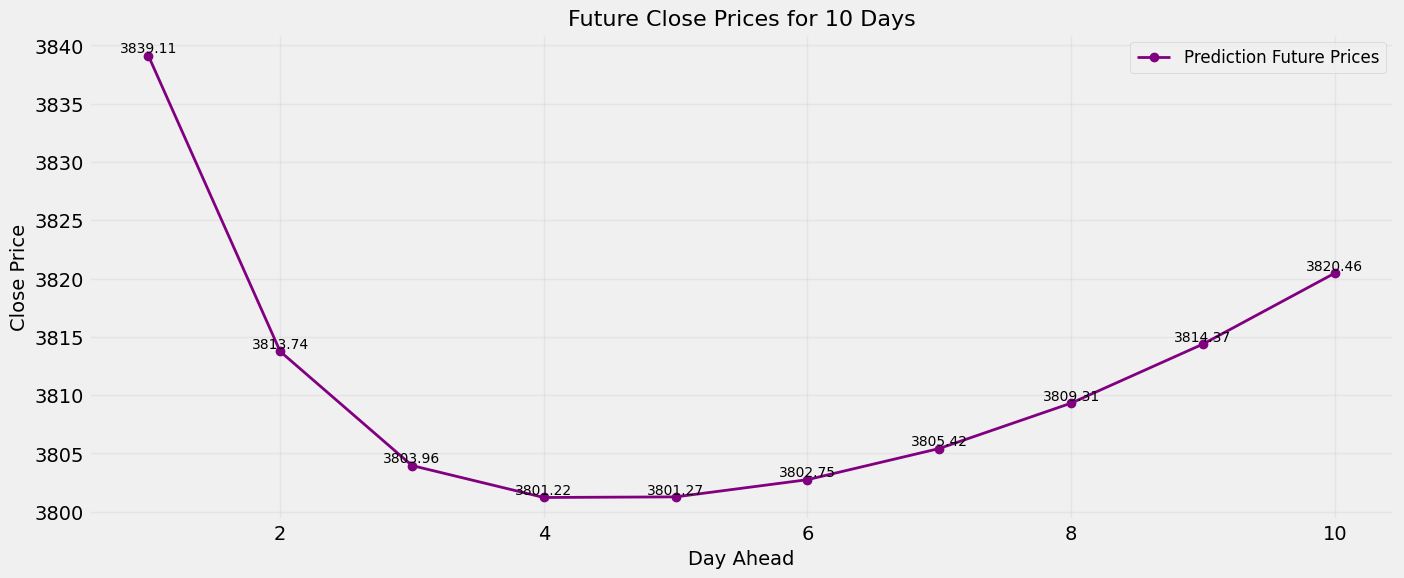

In [53]:
future_predictions = np.array(future_predictions).flatten()

plt.figure(figsize = (15, 6))
plt.plot(range(1, 11), future_predictions, marker="o" ,label = 'Prediction Future Prices', color = 'purple', linewidth =2)

for i, val in enumerate(future_predictions):
    plt.text(i+1,val,  f'{val:.2f}', fontsize = 10, ha = 'center', va = 'bottom', color='black')

plt.title("Future Close Prices for 10 Days", fontsize = 16)
plt.xlabel("Day Ahead", fontsize = 14)
plt.ylabel('Close Price', fontsize = 14)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 12)
plt.show()

In [54]:
# Save model
model.save('model.keras', save_format='tf')

In [ ]:
<p align="center">
    <img src="https://komarev.com/ghpvc/?username=RichardoTeddy&color=blueviolet&style=flat-square" alt="Profile views counter" />
</p>